## Analyze train and test data

Study basic facts about data

In [3]:
#load packages

import pandas as pd
import numpy as np
import pickle

In [1]:
# load data

in_loc_train_article = "output/train_article.pkl"
in_loc_train_qas = "output/train_qas.pkl"

in_loc_test_article = "output/test_article.pkl"
in_loc_test_qas = "output/test_qas.pkl"

In [4]:
with open(in_loc_train_article,'rb') as file_:
    train_articles = pickle.load(file_)

with open(in_loc_train_qas,'rb') as file_:
    train_qas = pickle.load(file_)
    
train_articles = pd.DataFrame(train_articles)    
train_qas = pd.DataFrame(train_qas)

In [5]:
with open(in_loc_test_article,'rb') as file_:
    test_articles = pickle.load(file_)

with open(in_loc_test_qas,'rb') as file_:
    test_qas = pickle.load(file_)
    
test_articles = pd.DataFrame(test_articles)    
test_qas = pd.DataFrame(test_qas)

In [8]:
print("No. of articles in train data: %s" % train_articles.shape[0])
print("No. of articles in test data: %s"% test_articles.shape[0])
print("No. of question answer pair in train data: %s"% train_qas.shape[0])
print("No. of question answer pair in test data: %s"% test_qas.shape[0])

No. of articles in train data: 18896
No. of articles in test data: 2067
No. of question answer pair in train data: 87599
No. of question answer pair in test data: 34726


Study question type

In [10]:
train_qas.head()

,answer_start,answer_text,paragraph_id,question,question_id,title_id
0,515,Saint Bernadette Soubirous,0_0,To whom did the Virgin Mary allegedly appear i...,5733be284776f41900661182,0
1,188,a copper statue of Christ,0_0,What is in front of the Notre Dame Main Building?,5733be284776f4190066117f,0
2,279,the Main Building,0_0,The Basilica of the Sacred heart at Notre Dame...,5733be284776f41900661180,0
3,381,a Marian place of prayer and reflection,0_0,What is the Grotto at Notre Dame?,5733be284776f41900661181,0
4,92,a golden statue of the Virgin Mary,0_0,What sits on top of the Main Building at Notre...,5733be284776f4190066117e,0


In [9]:
def check_question_type(qa):
    keywords = ['what','when','who','how','which','why']
    
    for keyword in keywords:
        if keyword in qa.lower():
            return keyword
    return 'other'

In [11]:
train_question_type = []

for i,row in train_qas.iterrows():
    train_question_type.append(check_question_type(row['question']))

In [12]:
test_question_type = []

for i,row in test_qas.iterrows():
    test_question_type.append(check_question_type(row['question']))

In [14]:
train_question_distribution = [(x,train_question_type.count(x)) for x in set(train_question_type)]

In [16]:
train_question_distribution

[('why', 1199),
 ('how', 9312),
 ('which', 5892),
 ('when', 5842),
 ('other', 5134),
 ('what', 50860),
 ('who', 9360)]

In [15]:
test_question_distribution = [(x,test_question_type.count(x)) for x in set(test_question_type)]

In [17]:
test_question_distribution

[('why', 521),
 ('how', 3882),
 ('which', 2122),
 ('when', 2459),
 ('other', 1826),
 ('what', 19990),
 ('who', 3926)]

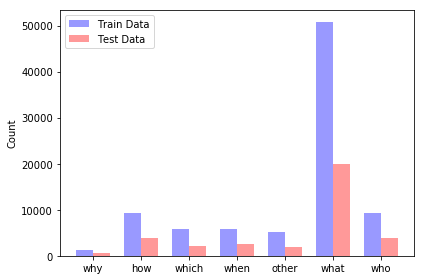

In [20]:
import matplotlib.pyplot as plt

n_groups = 7

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4

labels = [key for key,value in train_question_distribution]
train_sum = [value for key,value in train_question_distribution]
test_sum = [value for key,value in test_question_distribution]


rects1 = plt.bar(index, train_sum, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Train Data')
rects2 = plt.bar(index+ bar_width, test_sum, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Test Data')

plt.ylabel('Count')

plt.xticks(index + bar_width / 2, labels)
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
test_articles.iloc[0,0]

'Super Bowl 50 was an American football game to determine the champion of the National Football League (NFL) for the 2015 season. The American Football Conference (AFC) champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10 to earn their third Super Bowl title. The game was played on February 7, 2016, at Levi\'s Stadium in the San Francisco Bay Area at Santa Clara, California. As this was the 50th Super Bowl, the league emphasized the "golden anniversary" with various gold-themed initiatives, as well as temporarily suspending the tradition of naming each Super Bowl game with Roman numerals (under which the game would have been known as "Super Bowl L"), so that the logo could prominently feature the Arabic numerals 50.'

In [31]:
test_qas.iloc[0,1]

'Denver Broncos'

In [32]:
test_qas.iloc[6,1]

'Santa Clara, California'